Der *Moving Average Convergence Divergence (MACD)* ist ein beliebter Trendfolge-Momentum-Indikator, der uns dabei hilft, Handelssignale basierend auf der Beziehung zwischen zwei gleitenden Durchschnitten des Preises eines Wertpapiers zu generieren.

Die `prepare_data` Methode akzeptiert vier Parameter: die Frequenz (`freq`), den Kurzzeit-Exponential Moving Average (`ema_s_val`), den Langzeit-Exponential Moving Average (`ema_l_val`) und das Signal Moving Window (`signal_mw`).

In diesem Fall haben wir die Werte auf 60 für `freq`, 12 für `ema_s_val`, 20 für `ema_l_val` und 9 für `signal_mw` gesetzt. Diese Kombination von Parametern hat in unseren Tests gute Ergebnisse gezeigt.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt

In [ ]:
# Add the subfolders of the project to sys.path list
sys.path.append(os.path.abspath(os.path.join("..", "indicators")))
import strategies
from strategies import MACD

In [ ]:
ticker = "XRPUSDT"

## Initialize MACD Instance 

In [24]:
macd = MACD(symbol = ticker)
macd.data = data.copy()
# paramters: 60 für freq, 12 für ema_s_val, 20 für ema_l_val und 9 für signal_mw
macd.prepare_data(60, 12, 20, 9)

## Execute Backtest

In [ ]:
macd.run_backtest()

## Evaluate MACD

In [25]:
macd.results.dropna()

,Open,High,Low,Close,Volume,returns,position,strategy,trades,strategy_net
Date,,,,,,,,,,
2018-05-04 13:00:00,0.91450,0.91596,0.91402,0.91596,59299.49,0.016157,0,0.0,0.0,0.000
2018-05-04 14:00:00,0.90100,0.90101,0.90000,0.90098,71954.37,-0.016490,0,-0.0,0.0,-0.000
2018-05-04 15:00:00,0.89791,0.89791,0.89576,0.89722,8394.34,-0.004182,0,-0.0,0.0,-0.000
2018-05-04 16:00:00,0.90272,0.90277,0.90111,0.90275,13925.62,0.006145,0,0.0,0.0,0.000
2018-05-04 17:00:00,0.88299,0.88390,0.88212,0.88389,50509.12,-0.021113,0,-0.0,0.0,-0.000
...,...,...,...,...,...,...,...,...,...,...
2022-11-09 19:00:00,0.34640,0.34720,0.34640,0.34710,435800.00,-0.026441,0,-0.0,1.0,-0.001
2022-11-09 20:00:00,0.35550,0.35630,0.35540,0.35580,212987.00,0.024756,0,0.0,0.0,0.000
2022-11-09 21:00:00,0.35110,0.35160,0.35070,0.35080,725592.00,-0.014153,0,-0.0,0.0,-0.000


In [26]:
macd.results.position.value_counts()

1    19894
0    19628
Name: position, dtype: int64

In [30]:
np.exp(macd.results.strategy_net.sum())

0.0897010291108115

In [29]:
np.exp(macd.results.strategy.sum())

2.7975022425331906

In [ ]:
macd.results.dropna()

In [31]:
macd.results.trades.value_counts()

0.0    36080
1.0     3440
Name: trades, dtype: int64

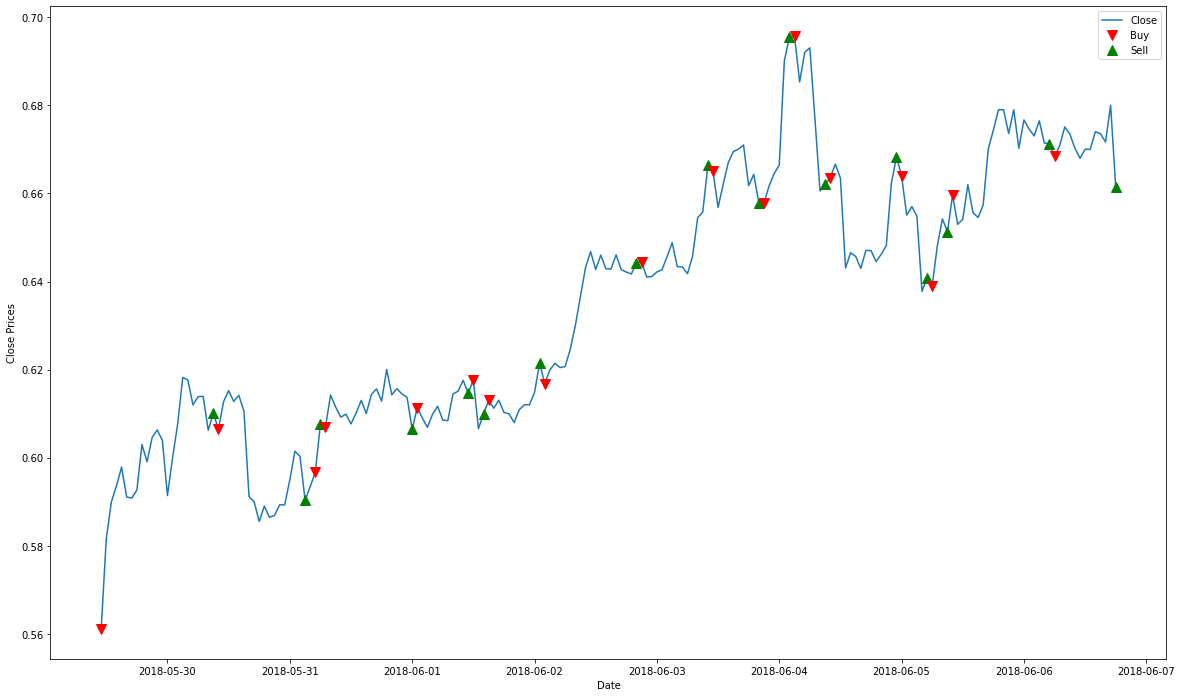

In [40]:
# Plot the Close prices
df = macd.results.iloc[600:800, :]
plt.figure(figsize=(20, 12))
plt.plot(df.index, df["Close"])

# Initialize previous signal variable
prev_signal = None

# Add arrows for buy (1) and sell (0) signals
for i in range(len(df)):
    if df["trades"][i] == 1 and prev_signal != 1:
        plt.plot(df.index[i], df["Close"][i], "^g", markersize=10)
        prev_signal = 1
    elif df["trades"][i] == 0 and prev_signal != 0:
        plt.plot(df.index[i], df["Close"][i], "vr", markersize=10)
        prev_signal = 0

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Close Prices")
plt.legend(["Close", "Buy", "Sell"])

# Show the plot
plt.show()